# Analisis de resultados NBA (con ELO)

Analizamos los resultados de ELO y su diferencia con WP y CMM, para ello usamos datos de la liga nba.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

nba = pd.read_csv('../data/nba_2016_teams.csv', names=['id', 'team'])

In [61]:
nba['ELO'] = pd.read_csv('./TestsMassey/nba_2016_elo.out',sep=' ', header=None)
nba['WP'] = pd.read_csv('./TestsMassey/nba_2016_cmm.out',sep=' ', header=None)
nba['CMM'] = pd.read_csv('./TestsMassey/nba_2016_wp.out',sep=' ', header=None)

In [62]:
nba

,id,team,ELO,WP,CMM
0,1,Atlanta,102.259129,0.558822,0.565217
1,2,Boston,105.823213,0.565690,0.579710
2,3,Brooklyn,52.306689,0.290736,0.289855
3,4,Charlotte,98.057171,0.558224,0.558824
4,5,Chicago,83.223993,0.516007,0.507463
5,6,Cleveland,121.190781,0.692428,0.705882
6,7,Dallas,86.747905,0.502178,0.507246
7,8,Denver,75.126973,0.420858,0.414286
8,9,Detroit,88.323888,0.500250,0.507246
9,10,Golden_State,147.210635,0.874063,0.897059


Para tener datos comparables, normalizamos la columna *ELO* usando la norma infinito.

In [63]:
nba['ELO'] = nba['ELO'].apply(lambda x: x/nba['ELO'].max())

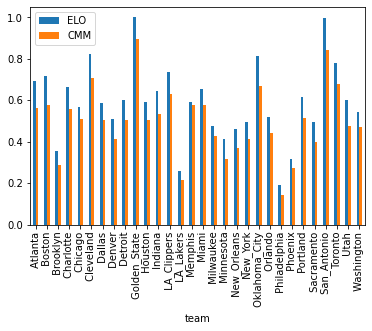

In [65]:
nba.plot.bar(x='team', y=['ELO','CMM'])

## Experimento 1

Modifico la entrada, hago que una de las victorias del equipo peor rankeado(Detroit) la gana por una diferencia de tantos inmensa (1000-91)

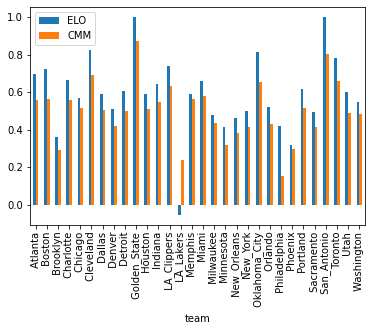

In [77]:
nba2 = pd.read_csv('../data/nba_2016_teams.csv', names=['id', 'team'])
nba2['ELO'] = pd.read_csv('./TestsMassey/nba_2016_dif_elo.out',sep=' ', header=None)
nba2['ELO'] = nba2['ELO'].apply(lambda x: x/nba2['ELO'].max())
nba2['CMM'] = pd.read_csv('./TestsMassey/nba_2016_dif_cmm.out',sep=' ', header=None)

nba2.plot.bar(x='team', y=['ELO','CMM']).figure.savefig('TestsMassey/EloDiff.png')

Observamos que el ranking CMM no se modifica, pero el ELO si. Vemos que el ranking de Detroit mejora mucho mientras que el ranking de los Lakers resulta negativo (el equipo que perdio contra Detroit por muchos tantos)